# Healthcare Cost Prediction -- Simple Regression Problem

Let's start with a very simple dataset - Medical Cost Personal Datasets. This dataset is from the book of Brett Lantz - Machine Learning with R. 
* Book Source: https://edu.kpfu.ru/pluginfile.php/278552/mod_resource/content/1/MachineLearningR__Brett_Lantz.pdf
* Dataset Source: https://github.com/stedy/Machine-Learning-with-R-datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

Loading BokehJS ...

Input data to python (with Dataframe format from pandas) 
1. What is pandas?
2. Why Dataframe

In [11]:
#  read csv file 
data_df = pd.read_csv("insurance.csv")
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Pre-processing: To know your data 
Check if we have missing value. We are not going to check missing values by eyes.

In [12]:
data_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* How to deal with the missing values?
    1. Ignore them
    2. Fill in with some values
    3. Start resaerch on it :) 

In [13]:
# Ignore them
data_df = data_df[pd.notnull(data_df).any(axis=1)]

Why do diverse data types annoy? e.g. int, float, string, boolean ... 
* Try this first ... 

In [14]:
data_df.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

DataFrame.corr( ): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html  
Support methods of: 
    * Pearson : Standard correlation coefficient, widely used, the degree of the relationship between linear related variables
    * Kendall : Kendall Tau correlation coefficient,  non-parametric test, the strength of dependence between two variables
    * Spearman : Spearman rank correlation, non-parametric test, the degree of association between two variables
    * Comparison of above three: http://www.statisticssolutions.com/wp-content/uploads/wp-post-to-pdf-enhanced-cache/1/correlation-pearson-kendall-spearman.pdf 

??? Why did we get only children, bmi, age, charges? where are sex, region, smoker? 

In [15]:
from sklearn.preprocessing import LabelEncoder
# sex
le = LabelEncoder()
le.fit(data_df.sex.drop_duplicates()) 
data_df.sex = le.transform(data_df.sex)
# smoking
le.fit(data_df.smoker.drop_duplicates()) 
data_df.smoker = le.transform(data_df.smoker)
# region
le.fit(data_df.region.drop_duplicates()) 
data_df.region = le.transform(data_df.region)

In [16]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [448]:
# Try correlation comutation again.
data_df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

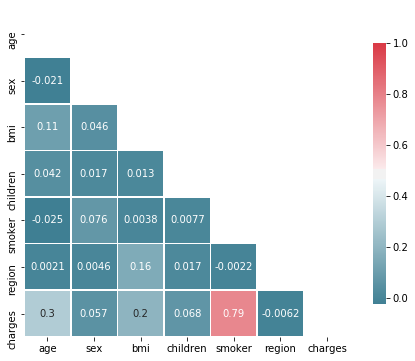

In [22]:
corr = data_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.8})
plt.show()

Let's have a look at the distributions!

In [23]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
import scipy.special
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p1 = figure(title="Distribution of charges",tools="save")
hist, edges = np.histogram(data_df.charges)
p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="#033649")
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'
show(gridplot(p1,ncols = 2, plot_width=400, plot_height=400, toolbar_location=None))

Loading BokehJS ...

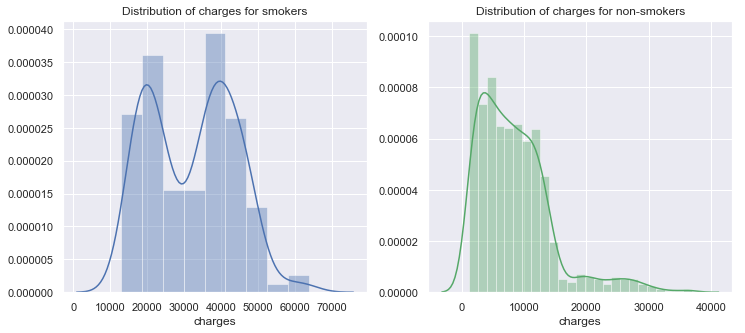

In [232]:
sns.set()
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data_df[(data_df.smoker == 1)]["charges"],ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data_df[(data_df.smoker == 0)]['charges'],color='g',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

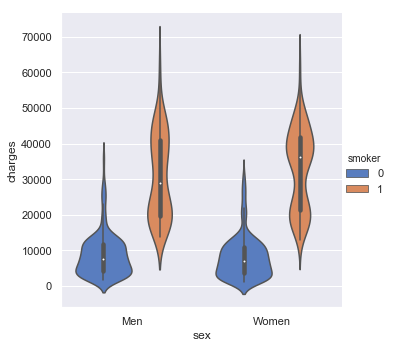

In [233]:
sns.set()
pic_sex = sns.catplot(x="sex", y="charges", hue="smoker", kind="violin", data=data_df, palette = 'muted')
pic_sex.set_xticklabels(["Men", "Women"])
plt.show()

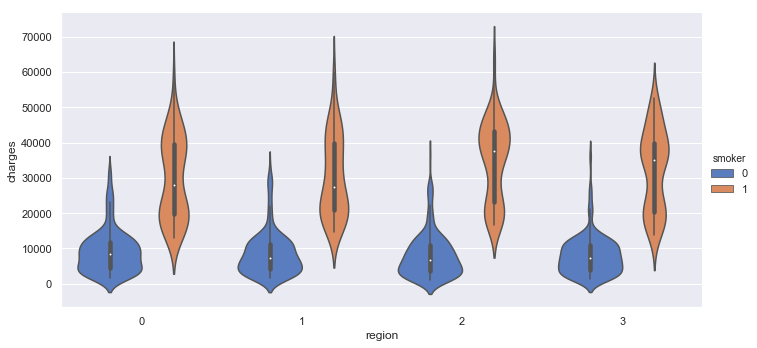

In [449]:
sns.set()
pic_cld = sns.catplot(x="region", y="charges", hue="smoker", kind="violin", data=data_df, palette = 'muted', aspect=2)
pic_sex.set_xticklabels(["Northeast", "Northwest", "Southeast", "Southwest"])
plt.show()

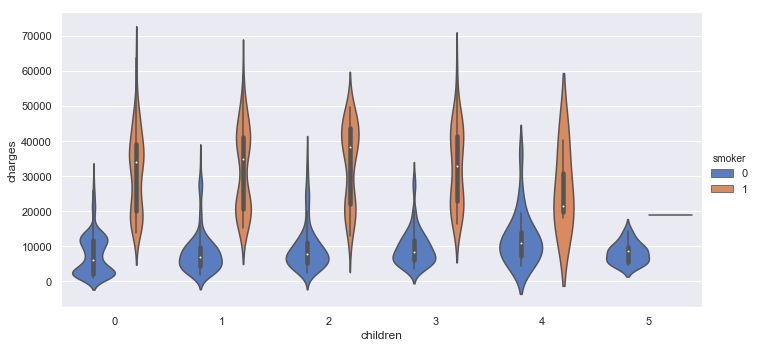

In [235]:
sns.set()
pic_cld = sns.catplot(x="children", y="charges", hue="smoker", kind="violin", data=data_df, palette = 'muted', aspect=2)
# pic_sex.set_xticklabels(["0", "Women"])
plt.show()

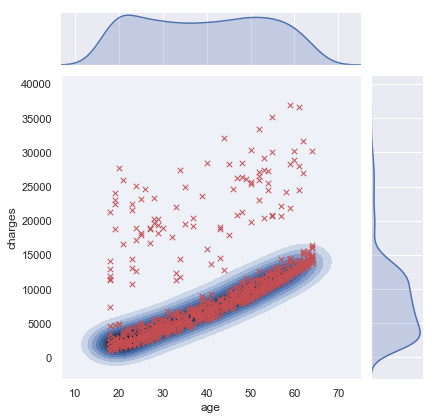

In [236]:
sns.set(style="white")
pic_ageCharge_smk = sns.jointplot(x="age", y="charges", data = data_df[(data_df.smoker == 0)],kind="kde", color="b")
pic_ageCharge_smk.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="x")
# g.ax_joint.collections[0].set_alpha(0)
# g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

plt.show()

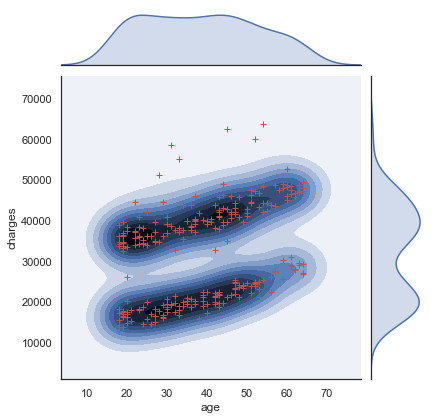

In [110]:
sns.set(style="white")
pic_ageCharge_Nsmk = sns.jointplot(x="age", y="charges", data = data_df[(data_df.smoker == 1)],kind="kde", color="b")
pic_ageCharge_Nsmk.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
ax.set_title('Distribution of charges and age for smokers')
plt.show()

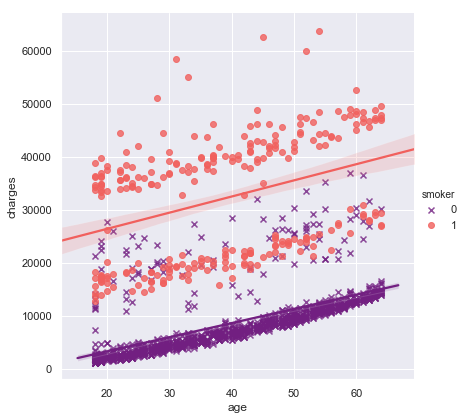

In [285]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data_df, palette = 'magma', height = 6, markers=["x", "o"])
ax.set_title('Smokers and non-smokers')
plt.show()

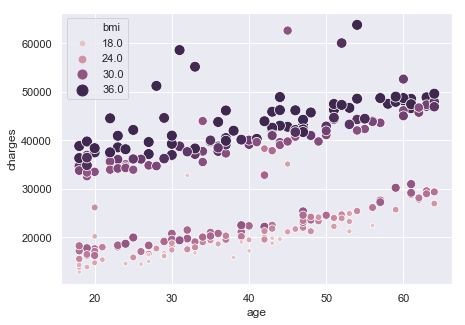

In [268]:
sns.set()
plt.figure(figsize=(7,5))
cmap = sns.cubehelix_palette(dark=.2, light=0.8, as_cmap=True)
ax = sns.scatterplot(x="age", y="charges",
                     hue="bmi", size='bmi',
                     palette=cmap, sizes=(20, 120),hue_norm=(20, 36),size_norm=(20,36),
                     data=data_df[(data_df.smoker == 1)])
plt.show()

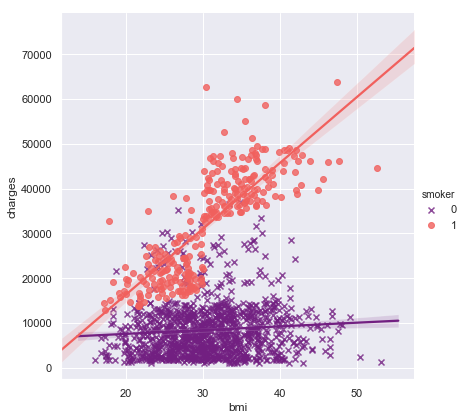

In [283]:
sns.set()
ax.set_title('Scatter plot of charges and bmi')
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data_df, palette = 'magma', height = 6, markers=["x", "o"])
plt.show()
# fig.savefig('BMI_Charge.png', bbox_inches='tight') 

In [459]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [455]:
features = data_df.drop(['charges'], axis = 1)
target = data_df.charges

x_train,x_test,y_train,y_test = train_test_split(features,target, random_state = 1)
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)

LR_model_train_pred = LR_model.predict(x_train)
LR_model_test_pred = LR_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,LR_model_train_pred),
mean_squared_error(y_test,LR_model_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,LR_model_train_pred),
r2_score(y_test,LR_model_test_pred)))

MSE train data: 36849010.767, MSE test data: 35807072.806
R2 train data: 0.755, R2 test data: 0.734


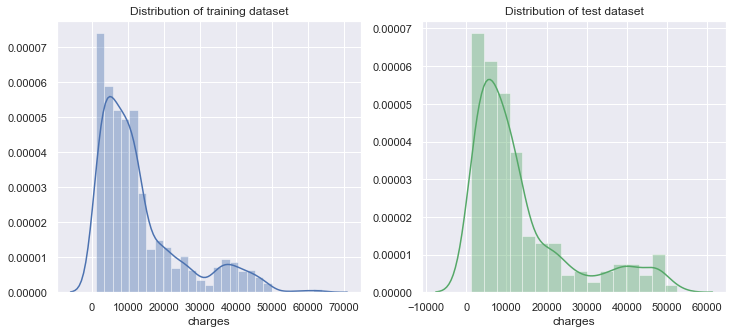

In [296]:
# How train, test dataset distributed
sns.set()
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(Y_train,ax=ax)
ax.set_title('Distribution of training dataset')

ax=f.add_subplot(122)
sns.distplot(Y_test,color='g',ax=ax)
ax.set_title('Distribution of test dataset')
plt.show()

Evalutaion: To show how good your model  
Why is important?  
What is the model used for?  
How can we choose? http://scikit-learn.org/stable/modules/model_evaluation.html 

In our case:  
Square of determination R^2  https://onlinecourses.science.psu.edu/stat501/node/255/  
Here are some basic characteristics of the measure:
* Since r2 is a proportion, it is always a number between 0 and 1.
* If r2 = 1, all of the data points fall perfectly on the regression line. The predictor x accounts for all of the variation in y!
* If r2 = 0, the estimated regression line is perfectly horizontal. The predictor x accounts for none of the variation in y!


In [447]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# mean_squared_error(y_test, y_test_pred)
mean_absolute_error(y_test, y_test_pred)

3998.271540886974

In [456]:
# Normalization
quad = PolynomialFeatures (degree = 2)
features_quad = quad.fit_transform(features)
features_df = pd.DataFrame(features_quad, columns=quad.get_feature_names(features.columns))

# MMscaler = MinMaxScaler()
# minmax_scaled_df = MMscaler.fit_transform(features)

# Roscaler = RobustScaler()
# robust_scaled_df = Roscaler.fit_transform(features)

X_train,X_test,Y_train,Y_test = train_test_split(features_df, target, random_state = 1)
LR_model.fit(x_train,y_train)

LR_model_train_pred = LR_model.predict(x_train)
LR_model_test_pred = LR_model.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,LR_model_train_pred),
mean_squared_error(y_test,LR_model_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,LR_model_train_pred),
r2_score(y_test,LR_model_test_pred)))

MSE train data: 36849010.767, MSE test data: 35807072.806
R2 train data: 0.755, R2 test data: 0.734


In [427]:
# Feature Selection/ranking
from sklearn.feature_selection import f_regression, mutual_info_regression

featInput = features_df
reduction = SelectKBest(f_regression, k='all') # VarianceThreshold, mutual_info_regression
#selector reduction
reduction.fit(featInput,target)
importances = reduction.scores_ 
pvalue = reduction.pvalues_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

new_order_feature = []
for f in range(featInput.shape[1]): 
    print("%d. feature %d %s (%f %f)" % (f + 1, indices[f], featInput.columns[indices[f]], importances[indices[f]], pvalue[f]))
    new_order_feature.append(featInput.columns[indices[f]])

Feature ranking:
1. feature 0 1 (nan nan)
2. feature 20 bmi smoker (3339.047418 0.000000)
3. feature 11 age smoker (2207.014573 0.036133)
4. feature 5 smoker (2177.614868 0.000000)
5. feature 25 smoker^2 (2177.614868 0.012852)
6. feature 26 smoker region (974.317413 0.000000)
7. feature 16 sex smoker (750.687713 0.820518)
8. feature 23 children smoker (508.014326 0.000000)
9. feature 9 age bmi (168.606477 0.000000)
10. feature 7 age^2 (132.880633 0.000000)
11. feature 1 age (131.174013 0.000001)
12. feature 3 bmi (54.709308 0.000000)
13. feature 18 bmi^2 (51.679283 0.000014)
14. feature 8 age sex (30.354378 0.036133)
15. feature 10 age children (23.677984 0.000192)
16. feature 12 age region (18.942296 0.003976)
17. feature 19 bmi children (14.211038 0.000000)
18. feature 14 sex bmi (13.984834 0.060252)
19. feature 15 sex children (8.323734 0.000000)
20. feature 4 children (6.206037 0.000171)
21. feature 2 sex (4.399702 0.000000)
22. feature 13 sex^2 (4.399702 0.095316)
23. feature 17 s

/Users/changsun/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/changsun/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/changsun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/changsun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/changsun/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


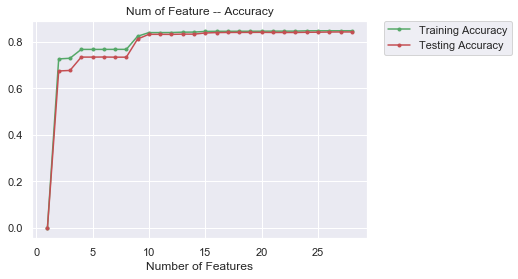

In [464]:
# RobustScaler
numFea = []
acc_train = []
acc_test = []
scoreFea = []

for i in range(1, len(new_order_feature)+1, 1):
    numFea.append(i)
    x_train,x_test,y_train,y_test = train_test_split(features_df[new_order_feature[0:i]], target, random_state = 1)
    LR_model.fit(x_train,y_train)
    model_train_pred = LR_model.predict(x_train)
    model_test_pred = LR_model.predict(x_test)
    acc_train.append(r2_score(y_train,model_train_pred))
    acc_test.append(r2_score(y_test,model_test_pred))
#     cvscore = cross_val_score(LR_model, features_df[new_order_feature[0:i]], target, scoring = 'r2', cv = 5) 
#     acc_test.append(np.mean(cvscore))
    
plt.figure()
plt.grid(True)
plt.title('Num of Feature -- Accuracy')
plt.xlabel("Number of Features")
plt.plot(numFea, acc_train, '.-', color="g", label="Training Accuracy")
plt.plot(numFea, acc_test, '.-', color="r", label="Testing Accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()    

In [440]:
# Outliers
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://scikit-learn.org/0.19/_images/sphx_glr_plot_outlier_detection_002.png", width=600, height=600)

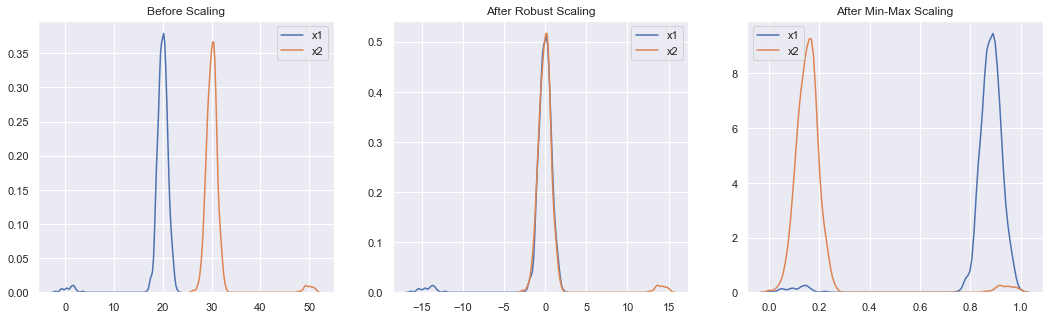

In [470]:
################### Different distributions of MinMax and Robust Scaler
from sklearn.preprocessing import StandardScaler,RobustScaler, MinMaxScaler
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})
# Use RobustScaler
robust_scaled_df = RobustScaler().fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

# Use MinMaxScaler
minmax_scaled_df = MinMaxScaler().fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1', 'x2'])
# Plot and visualize
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)
plt.show()